In [82]:
from prody import *

dcd = Trajectory('5uh5.dcd')

In [83]:
pdb = parsePDB('5uh5.pdb')

@> 50719 atoms and 1 coordinate set(s) were parsed in 0.29s.


In [84]:
dcd.link(pdb)
dcd.reset()

In [85]:
frame0 = dcd.next()
frame0

<Frame: 0 from 5uh5 (50719 atoms)>

In [86]:
ensemble = parseDCD('5uh5.dcd')


@> DCD file contains 9001 coordinate sets for 50719 atoms.
@> DCD file was parsed in 2.69 seconds.
@> 5225.16 MB parsed at input rate 1943.37 MB/s.
@> 9001 coordinate sets parsed at input rate 3347 frame/s.


In [87]:
ensemble.setAtoms(pdb.calpha)
ensemble.setCoords(pdb)
ensemble.superpose()

@> Superposition completed in 25.63 seconds.


In [88]:
dcd.setAtoms(pdb.calpha)
eda_trajectory = EDA('MDM2 Trajectory')
eda_trajectory.buildCovariance( dcd )
eda_trajectory.calcModes()
#ensemble.buildCovariance( ensemble )
#ensemble.calcModes()

@> Covariance will be calculated using 9001 frames.
@> Covariance matrix calculated in 1237.345424s.
@> 20 modes were calculated in 55.33s.


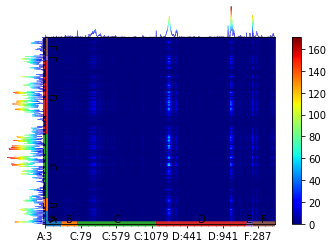

In [89]:
show = showPerturbResponse(eda_trajectory, atoms=pdb.calpha)

In [90]:
#import matplotlib.pyplot as plt
#show.savefig('prs_map.png', dpi=1600)
#writeNMD('prs_5uh5.nmd', eda_trajectory, pdb.calpha)\


In [91]:
import matplotlib.pyplot as plt
ax = show[0].axes
ax.figure.savefig('5uh5_prs_map.png',dpi = 1600)

# Close the plot
plt.close(ax.figure)

In [92]:
writeNMD('prs_5uh5.nmd', eda_trajectory, pdb.calpha)

'prs_5uh5.nmd'

In [93]:
saveModel(eda_trajectory, '5uh5_prs', matrices=True)

'5uh5_prs.eda.npz'

In [94]:
prs_mat, effectiveness, sensitivity = calcPerturbResponse(eda_trajectory)

In [95]:
(pdb.calpha).setBetas(effectiveness)
writePDB('5uh5_ca_effectiveness.pdb',pdb.calpha)
pdb.calpha.setBetas(sensitivity)
writePDB('5uh5_ca_sensitivity.pdb',pdb.calpha)

'5uh5_ca_sensitivity.pdb'

NameError: name 'savefig' is not defined

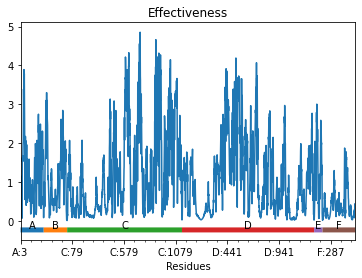

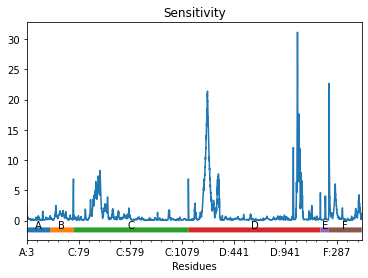

In [96]:
showPerturbResponse(eda_trajectory, atoms=pdb.calpha,show_matrix=False)
savefig('5uh5_prs_eff.png',dpi = 1600)

AttributeError: 'tuple' object has no attribute 'write_image'

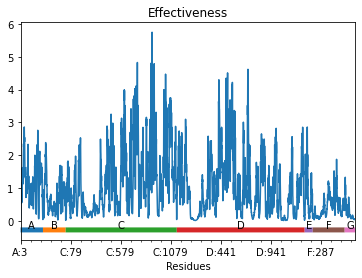

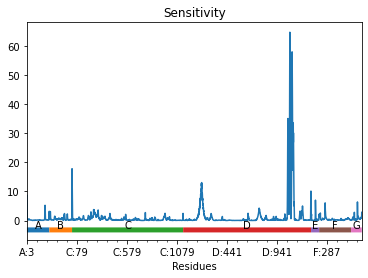

In [74]:
import plotly.io as pio

# Generate the plots using showPerturbResponse
showPerturbResponse(eda_trajectory, atoms=pdb.calpha, show_matrix=False)

# Save the plots as images
for i, plot_data in enumerate(show):
    fig, _ = plot_data,None
    fig.write_image(f"plot{i+1}.png")


ValueError: too many values to unpack (expected 3)

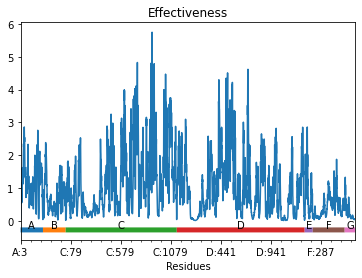

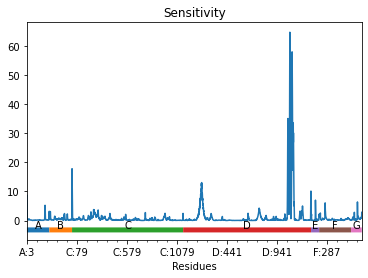

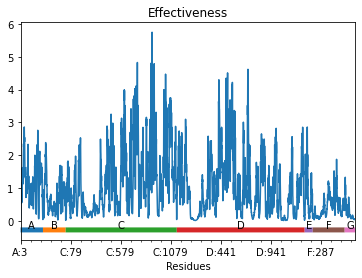

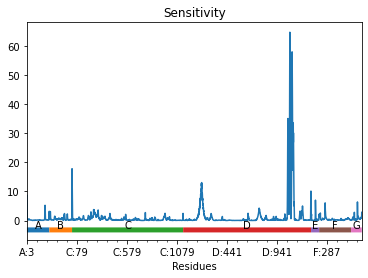

AttributeError: 'tuple' object has no attribute 'tolist'

In [65]:
import plotly.graph_objects as go

# Example array
data = effectiveness

# Create a scatter plot of the array values
fig = go.Figure(data=go.Scatter(y=data, mode='lines'))

# Add axis labels and title
fig.update_layout(
    title='Array Plot',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Value')
)

# Show the plot
fig.show()


In [70]:
pdb.calpha[0].get_index()

AttributeError: Atom object has no attribute `get_index` and 'get_index' is not a valid selection string